# 결정 트리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기

In [35]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [36]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [37]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [38]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [39]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [40]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [41]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [42]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [43]:
from sklearn.preprocessing import StandardScaler  # 데이터 표준화를 위한 StandardScaler 클래스를 sklearn 라이브러리에서 가져옵니다.
# StandardScaler는 데이터의 평균을 0, 분산을 1로 맞추어 표준화하는 도구입니다.

ss = StandardScaler()  # StandardScaler 객체를 생성합니다.
ss.fit(train_input)  # 학습 데이터(train_input)의 평균과 표준편차를 계산하여 스케일러를 학습시킵니다.

train_scaled = ss.transform(train_input)  # 학습 데이터를 표준화하여 train_scaled에 저장합니다.
test_scaled = ss.transform(test_input)  # 테스트 데이터를 표준화하여 test_scaled에 저장합니다.

In [44]:
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 모델을 위한 LogisticRegression 클래스를 sklearn 라이브러리에서 가져옵니다.
# LogisticRegression은 이진 분류를 수행하는 선형 모델로, 데이터의 특성에 가중치를 부여하여 두 클래스 중 하나를 예측합니다.

lr = LogisticRegression()  # LogisticRegression 객체를 생성합니다.
lr.fit(train_scaled, train_target)  # 학습 데이터(train_scaled)와 타겟(train_target)을 사용하여 모델을 학습시킵니다.

print(lr.score(train_scaled, train_target))  # 학습 데이터에 대한 모델의 정확도를 출력합니다.
print(lr.score(test_scaled, test_target))  # 테스트 데이터(test_scaled)에 대한 모델의 정확도를 출력합니다.


0.7808350971714451
0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

In [45]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


## 결정 트리

In [46]:
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier 클래스를 sklearn 라이브러리에서 가져옵니다.

dt = DecisionTreeClassifier(random_state=42)  # DecisionTreeClassifier 모델을 생성하고, random_state를 42로 설정하여 결과의 일관성을 유지합니다.
dt.fit(train_scaled, train_target)  # 학습 데이터(train_scaled)와 타겟(train_target)을 사용하여 모델을 학습시킵니다.

print(dt.score(train_scaled, train_target))  # 학습 데이터에 대한 모델의 정확도를 출력합니다.
print(dt.score(test_scaled, test_target))  # 테스트 데이터(test_scaled)에 대한 모델의 정확도를 출력합니다.


0.996921300750433
0.8592307692307692


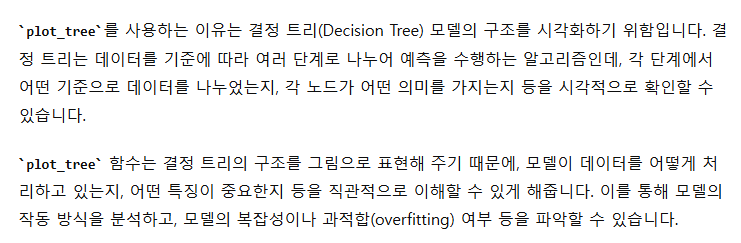

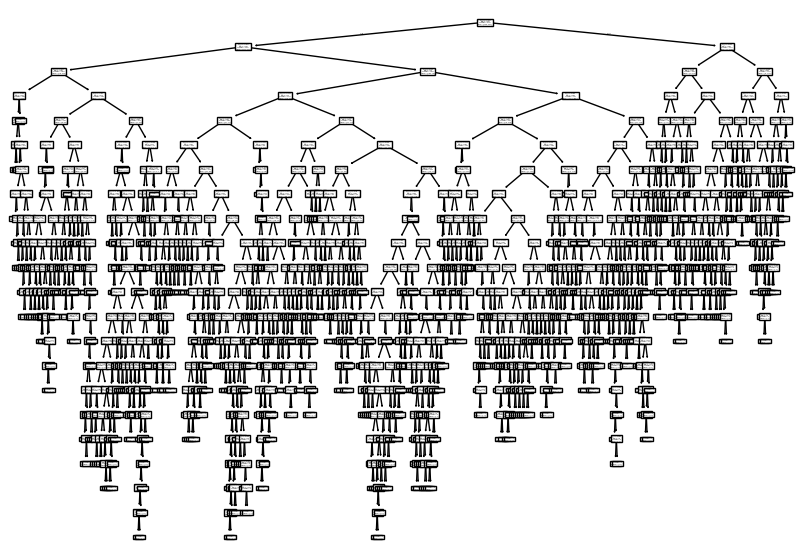

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

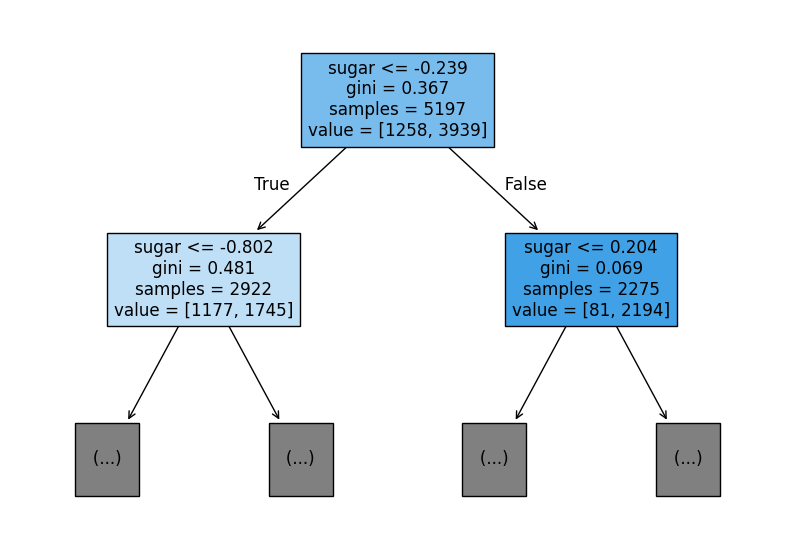

In [47]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 가지치기

In [48]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


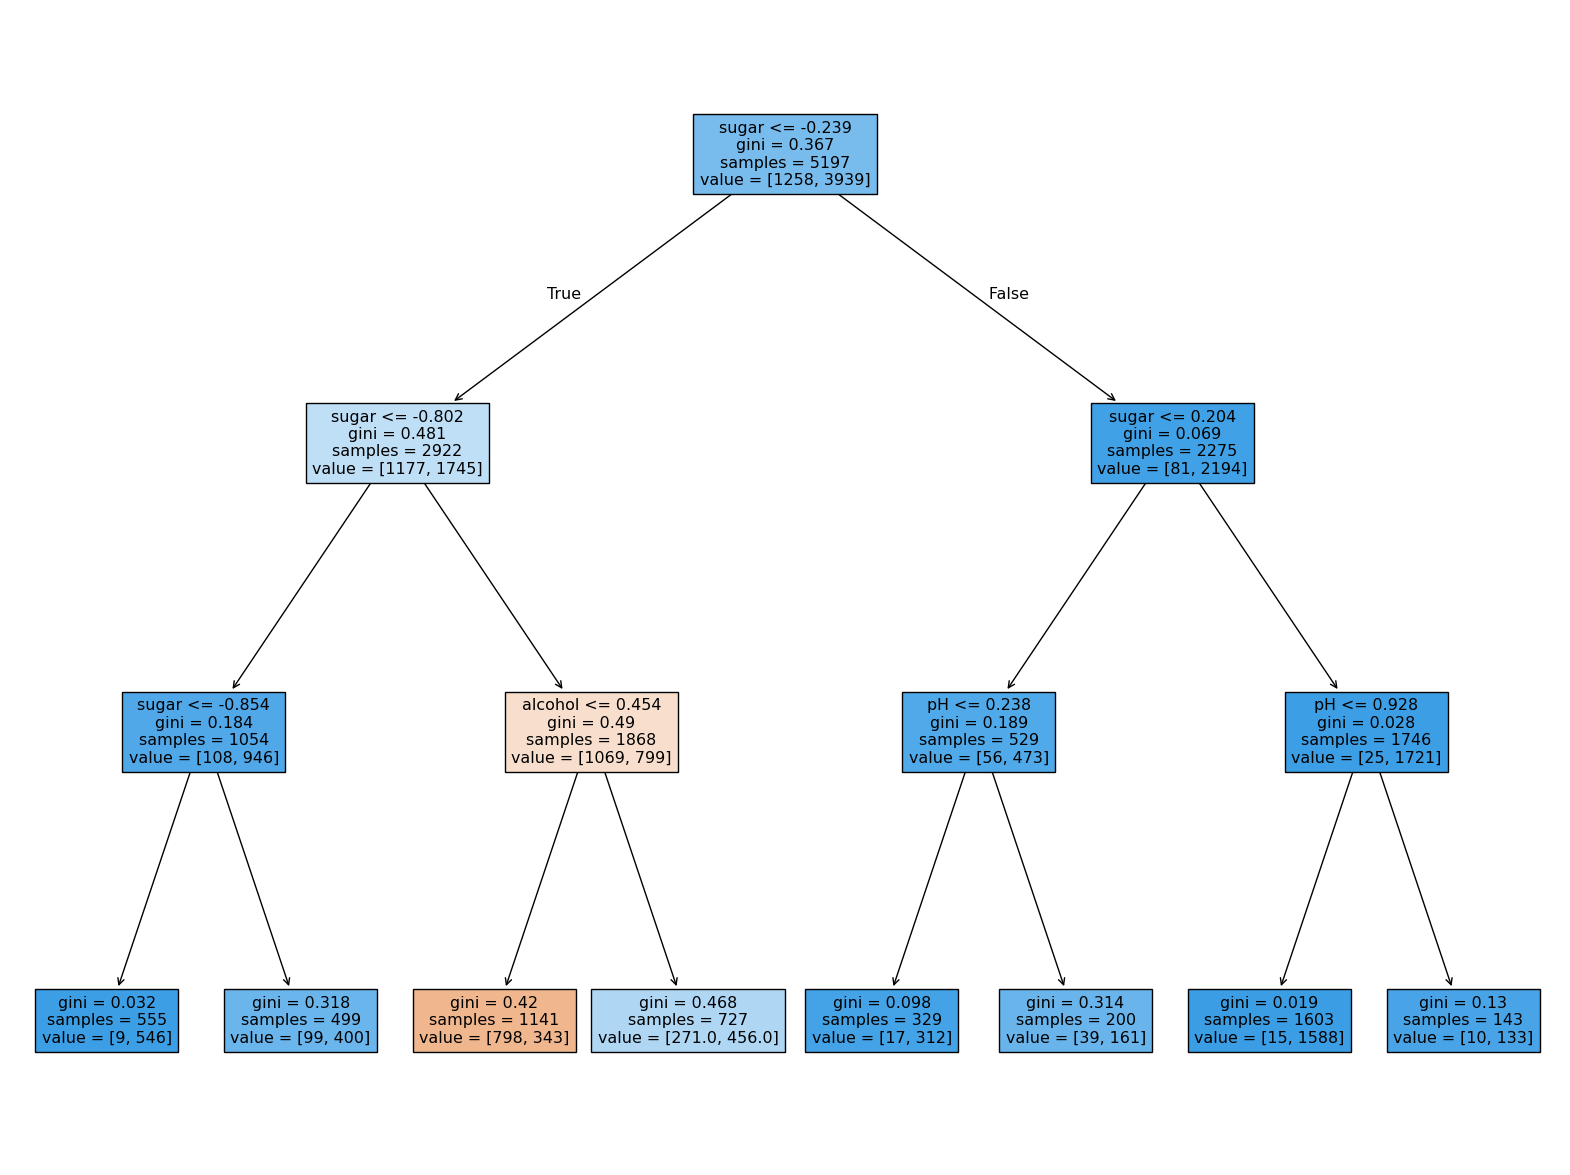

In [49]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [50]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


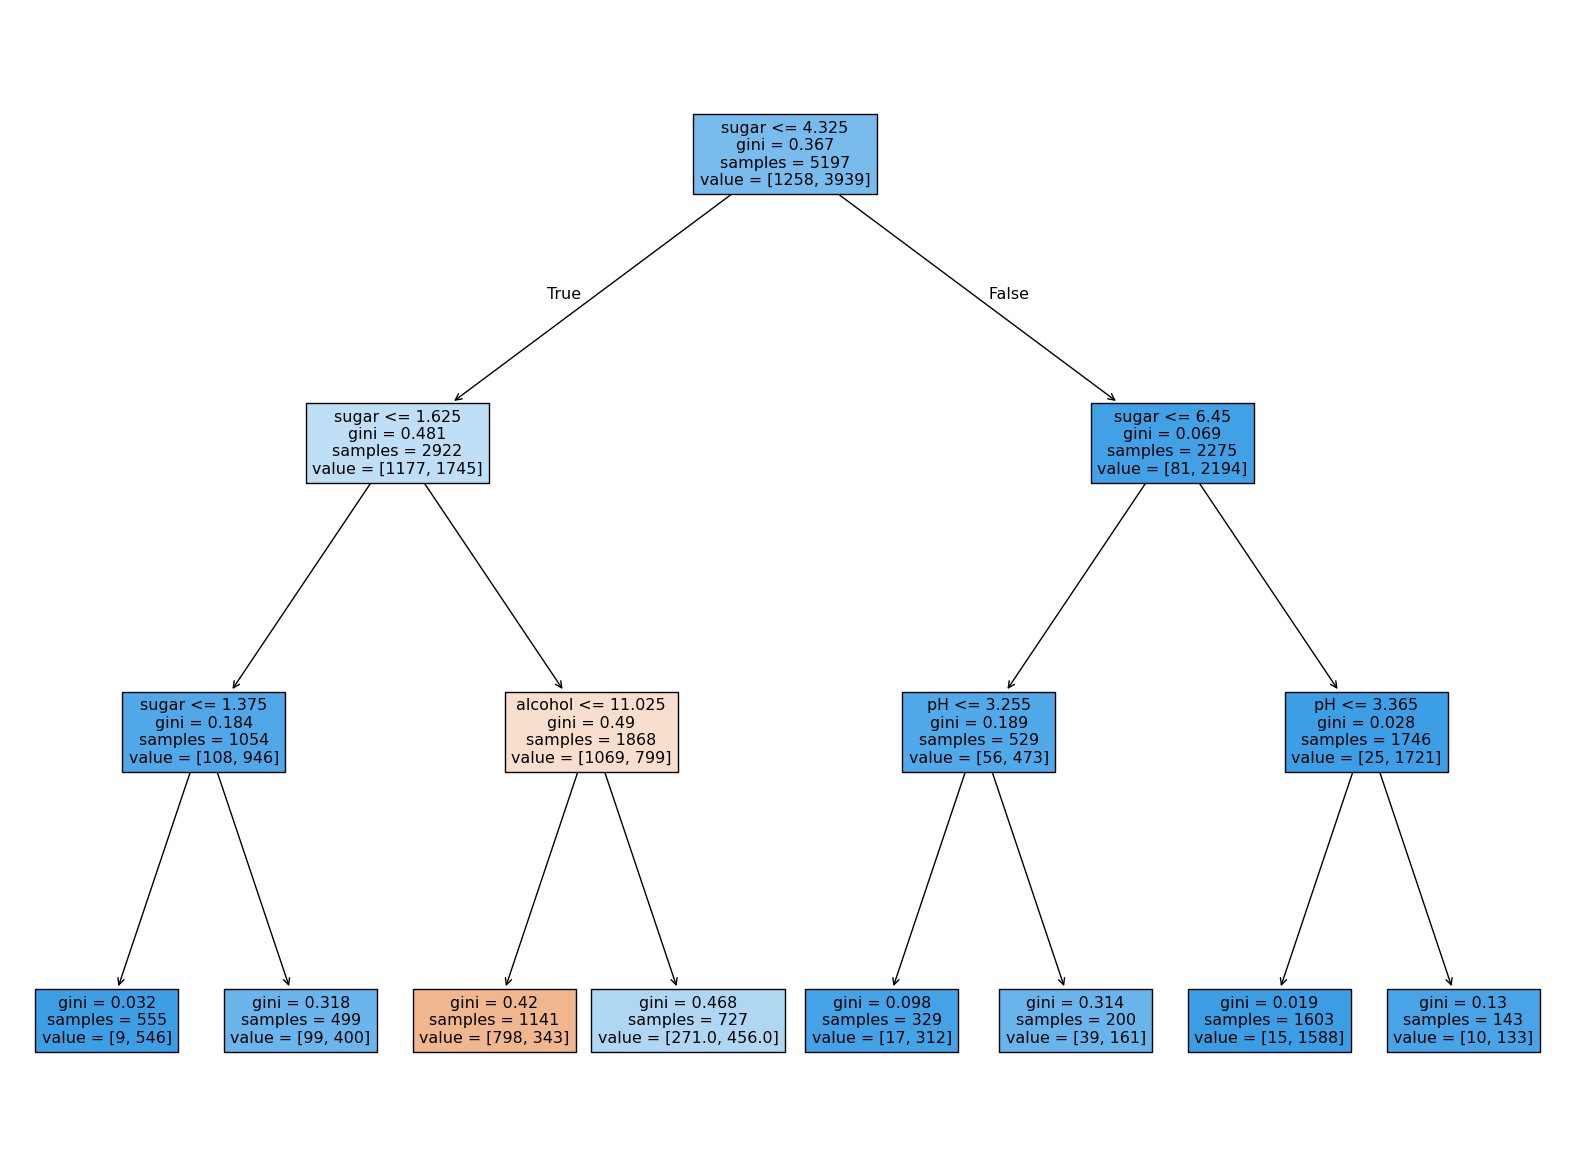

In [51]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [52]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


## 확인문제

In [53]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


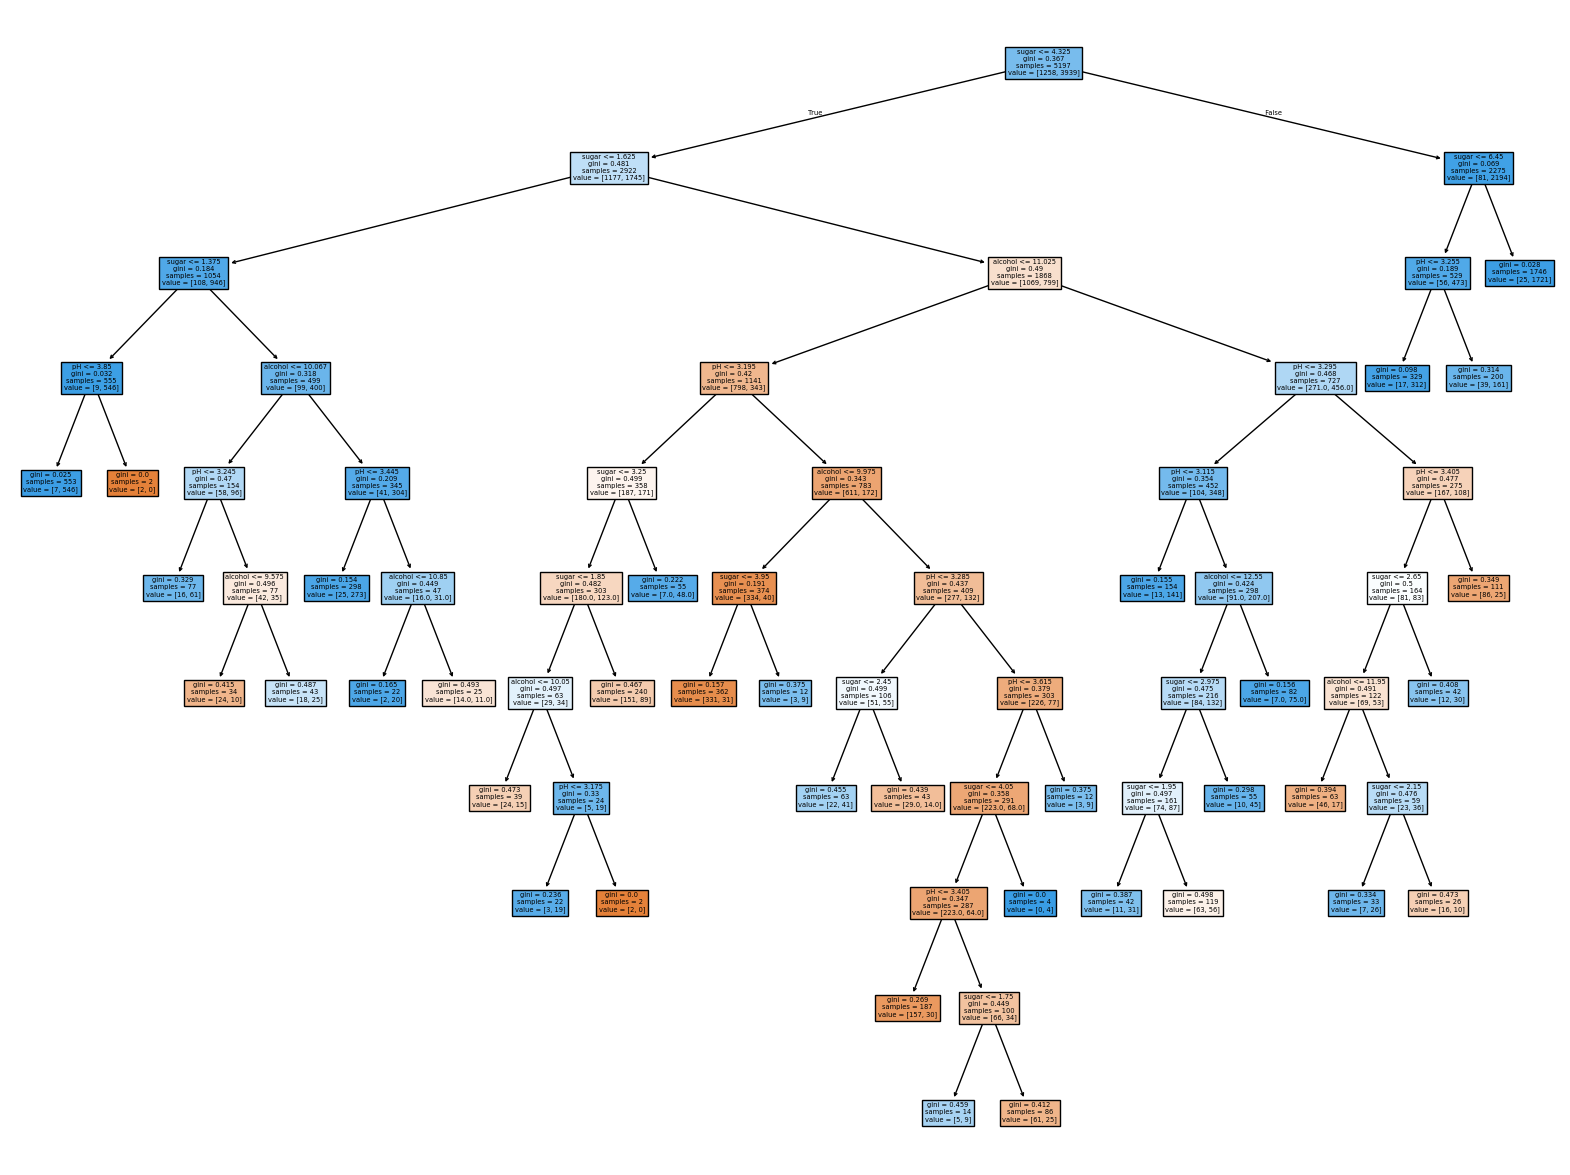

In [54]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()